<a href="https://colab.research.google.com/github/YoungriKIM/Using_Colab/blob/main/m21_FI_RF4_boston_plus_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

feature_names_1: 
 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
importances_1 : 
 [0.04259818 0.00088382 0.00682714 0.00124707 0.02907384 0.43833756
 0.01276669 0.04060076 0.00517826 0.01196683 0.02237313 0.01010887
 0.37803785]
score_1:  0.873118986297473


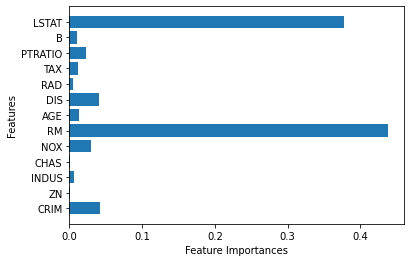

feature_names_2: 
 ['ZN', 'CHAS']
importances_2 : 
 [0.04360967 0.00566787 0.02842742 0.45471685 0.01183835 0.04814707
 0.00364681 0.00923406 0.02460907 0.01083654 0.35926629]
score_2:  0.872491444337033


In [11]:
# feature_importances_를 이용해 칼럼별 중요도를 그래프로 출력해보고
# 중요도가 적은 칼럼을 삭제하여 기존과 비교해보자

import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#1. 데이터 지정, 전처리
dataset = load_boston()
x = dataset.data
y = dataset.target
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=519)

#2. 모델(모델1)
model = RandomForestRegressor()

#3. 컴파일ㄴ 훈련ㅇ
model.fit(x_train, y_train)

#4. 평가(스코어)
score_1 = model.score(x_test, y_test)
print('feature_names_1: \n', dataset.feature_names)
print('importances_1 : \n', model.feature_importances_)
print('score_1: ', score_1)


# 중요도 그래프 그리기(솎기 전)
def plot_feature_importances_datasets(model):
    n_features = x.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features), dataset.feature_names)
    plt.xlabel('Feature Importances')
    plt.ylabel('Features')
    plt.ylim(-1, n_features)

plot_feature_importances_datasets(model)
plt.show()


# 남길 개수 정하고 솎는 함수(수현)
def cut_columns(feature_importances, columns, number):
    temp = []
    for i in feature_importances:
        temp.append(i)
    temp.sort()                 # 큰 수부터 앞으로 정렬
    temp = temp[:number]        # 내가 지정해준 개수만 반환
    result = []
    for j in temp:
        index = feature_importances.tolist().index(j)
        result.append(columns[index])       # columns는 feature_names를 지정할 예정
    return result

# x데이터를 솎은 모델을 만들자(모델2)
x2 = pd.DataFrame(dataset.data, columns = dataset.feature_names)
# 필요한 만큼만 위의 함수를 이용해 남기기
x2.drop(cut_columns(model.feature_importances_, dataset.feature_names, 2), axis=1, inplace=True)
# 내가 남긴 것들의 칼럼명 출력
print('feature_names_2: \n',cut_columns(model.feature_importances_, dataset.feature_names, 2))

# 모델2를 위한 전처리(x가 x2로 변경, random_state 동일하게 유지)
x2_train, x2_test, y_train, y_test = train_test_split(x2.values, y, test_size = 0.2, shuffle=True, random_state= 519)

#2. 모델1과 동일
model2 = RandomForestRegressor()

#3. 컴파일ㄴ 훈련ㅇ
model2.fit(x2_train, y_train)

#4. 평가(스코어)
score_2 = model2.score(x2_test, y_test)
print('importances_2 : \n', model2.feature_importances_)
print('score_2: ', score_2)

# =========================================================
# score_1:  0.873118986297473

# score_2:  0.872491444337033